## **Data download**

In [ ]:
!wget https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma?dl=0

--2020-07-30 07:33:58--  https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma [following]
--2020-07-30 07:33:59--  https://www.dropbox.com/sh/raw/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb898b7029d4be36ad70c3bf230.dl.dropboxusercontent.com/zip_download_get/Af7r0ZXIOjekRSKJByREspG7HPaGYVDNMyIOVK9qNCZtVQ1ivW--ZXlUjQpk3GP6qOZ-ptDN36puV4XIU5ETCjOEkyKZad1bWcebAQFsLM4lsg [following]
--2020-07-30 07:33:59--  https://ucb898b7029d4be36ad70c3bf230.dl.dropboxusercontent.com/zip_download_get/Af7r0ZXIOjekRSKJByREspG7HPaGYVDNMyIOVK9qNCZtVQ1ivW--ZXlUjQpk3GP6qOZ-ptDN36puV4XIU5ET

In [ ]:
#renamed the folder to dataset. Next unzipping the folder
!unzip dataset

Archive:  dataset
mapname:  conversion of  failed
   creating: valid/
   creating: train/
 extracting: train/images.csv        
 extracting: train/labels.csv        
 extracting: valid/images (1).csv    
 extracting: valid/labels (1).csv    


## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense, Input,Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop , schedules
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau, EarlyStopping

## **Loading the Data and Data Preprocessing**

In [ ]:
train_Image = pd.read_csv("/content/train/images.csv",header=None)
train_Labels = pd.read_csv("/content/train/labels.csv",header=None)

validation_Image = pd.read_csv("/content/valid/images (1).csv",header=None)
validation_Labels = pd.read_csv("/content/valid/labels (1).csv",header=None)


In [ ]:
train_Image.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8152,8153,8154,8155,8156,8157,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,0.729412,0.725490,0.619608,0.674510,0.643137,0.705882,0.713726,0.658824,0.615686,0.690196,0.654902,0.525490,0.556863,0.541176,0.482353,0.588235,0.615686,0.600000,0.603922,0.627451,0.678431,0.658824,0.698039,0.576471,0.678431,0.686275,0.690196,0.705882,0.705882,0.643137,...,0.650980,0.666667,0.666667,0.709804,0.682353,0.682353,0.682353,0.658824,0.682353,0.643137,0.627451,0.623529,0.650980,0.721569,0.627451,0.635294,0.709804,0.690196,0.678431,0.647059,0.658824,0.682353,0.654902,0.694118,0.741176,0.678431,0.662745,0.729412,0.694118,0.647059,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,0.678431,0.709804,0.713726,0.686275,0.717647,0.713726,0.694118,0.690196,0.721569,0.701961,0.698039,0.713726,0.705882,0.756863,0.756863,0.694118,0.650980,0.674510,0.752941,0.725490,0.725490,0.760784,0.678431,0.717647,0.725490,0.682353,0.709804,0.729412,0.721569,0.717647,...,0.686275,0.670588,0.713726,0.733333,0.725490,0.694118,0.694118,0.686275,0.674510,0.729412,0.721569,0.701961,0.682353,0.709804,0.756863,0.698039,0.729412,0.721569,0.674510,0.698039,0.725490,0.733333,0.666667,0.682353,0.701961,0.737255,0.745098,0.725490,0.698039,0.650980,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,0.690196,0.670588,0.662745,0.666667,0.713726,0.701961,0.721569,0.713726,0.662745,0.698039,0.682353,0.639216,0.717647,0.658824,0.674510,0.639216,0.643137,0.635294,0.654902,0.682353,0.639216,0.733333,0.690196,0.658824,0.686275,0.658824,0.690196,0.698039,0.709804,0.650980,...,0.533333,0.572549,0.537255,0.549020,0.670588,0.690196,0.670588,0.643137,0.662745,0.713726,0.717647,0.721569,0.709804,0.674510,0.709804,0.686275,0.658824,0.694118,0.698039,0.694118,0.678431,0.678431,0.690196,0.662745,0.650980,0.650980,0.686275,0.631373,0.666667,0.701961,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,0.631373,0.650980,0.670588,0.737255,0.674510,0.615686,0.670588,0.705882,0.686275,0.678431,0.694118,0.647059,0.662745,0.682353,0.654902,0.721569,0.709804,0.631373,0.670588,0.674510,0.701961,0.725490,0.666667,0.647059,0.733333,0.682353,0.678431,0.603922,0.666667,0.713726,...,0.670588,0.705882,0.749020,0.662745,0.564706,0.623529,0.674510,0.709804,0.658824,0.631373,0.705882,0.670588,0.658824,0.690196,0.674510,0.658824,0.635294,0.682353,0.682353,0.639216,0.666667,0.654902,0.647059,0.670588,0.682353,0.639216,0.705882,0.729412,0.674510,0.666667,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,0.631373,0.709804,0.694118,0.698039,0.666667,0.690196,0.690196,0.682353,0.682353,0.647059,0.678431,0.658824,0.760784,0.729412,0.674510,0.694118,0.698039,0.713726,0.690196,0.698039,0.686275,0.705882,0.662745,0.670588,0.705882,0.682353,0.690196,0.733333,0.709804,0.701961,...,0.639216,0.690196,0.662745,0.658824,0.662745,0.698039,0.603922,0.690196,0.627451,0.627451,0.654902,0.725490,0.650980,0.717647,0.666667,0.709804,0.682353,0.674510,0.721569,0.741176,0.635294,0.615686,0.674510,0.690196,0.658824,0.694118,0.701961,0.670588,0.721569,0.780392,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [ ]:
train_Labels = train_Labels.astype(int)
validation_Labels = validation_Labels.astype(int)
train_Labels.head(5)

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
print("Train data dimension is :", train_Image.shape ,train_Labels.shape )
print("Validation data dimension is :", validation_Image.shape , validation_Labels.shape)

Train data dimension is : (3200, 8192) (3200, 4)
Validation data dimension is : (800, 8192) (800, 4)


In [ ]:
#8192 is nothing but 64*128, therefore reshaping them into 64*128(representing the width and height of the image).

x_train =train_Image.values.reshape(3200,64,128,1)
x_train = x_train.astype('float32')

x_val =validation_Image.values.reshape(800,64,128,1)
x_val = x_val.astype('float32')

y_train = train_Labels.values
y_val = validation_Labels.values

## **Visualizing the data**

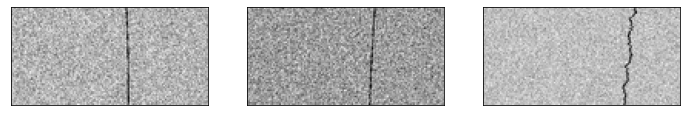

In [ ]:
#randomly plotting three images from the train dataset
plt.figure(0, figsize=(12,12))

for i in range(1,4):
 plt.subplot(1,3,i)
 img = np.squeeze(x_train[np.random.randint(0, x_train.shape[0])])
 plt.xticks([])
 plt.yticks([])
 plt.imshow(img,cmap="gray")

## **Training and Validation Data Generators**

In [ ]:
#Since the image is already processed and normalized, it doesn’t need a lot of pre-processing.
train_datagen = ImageDataGenerator (horizontal_flip =True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=32, shuffle=True)

val_datagen = ImageDataGenerator (horizontal_flip =False)
validation_generator = val_datagen.flow(x_val, y_val, batch_size=32,shuffle=True)

## **Designing a Convolutional Neural Network (CNN) Model**

In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5),padding='same', input_shape=(64, 128,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=[2, 2]))
#model.add(Dropout(0.6))# 2nd Convolution layer

model.add(Conv2D(64,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=[4, 4]))
#model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 32)       832       
_________________________________________________________________
activation (Activation)      (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 64, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 64, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 16, 64)         0

## **Compiling and Training the model**

In [ ]:
initial_learning_rate = 0.005
lr_schedule =schedules.ExponentialDecay(
initial_learning_rate,
decay_steps=5,
decay_rate=0.96,
staircase=True)
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_loss',save_weights_only=True, mode='min', verbose=0)
es_callback = EarlyStopping(monitor='val_loss', patience=10)
callbacks = [es_callback]
batch_size = 32
no_of_steps = len(x_train)/batch_size
no_of_val_steps = len(x_val)/batch_size

history = model.fit_generator(train_generator, steps_per_epoch=no_of_steps,
validation_data = validation_generator,
validation_steps = no_of_val_steps,
epochs=50,
#callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
100/100 [==============================] - 1s 14ms/step - loss: 0.6467 - accuracy: 0.6812 - val_loss: 2.5081 - val_accuracy: 0.2500
Epoch 2/50
100/100 [==============================] - 1s 11ms/step - loss: 0.4448 - accuracy: 0.7275 - val_loss: 2.7514 - val_accuracy: 0.2862
Epoch 3/50
100/100 [==============================] - 1s 11ms/step - loss: 0.3847 - accuracy: 0.7453 - val_loss: 2.1018 - val_accuracy: 0.4875
Epoch 4/50
100/100 [==============================] - 1s 12ms/step - loss: 0.3808 - accuracy: 0.7563 - val_loss: 3.7647 - val_accuracy: 0.4950
Epoch 5/50
100/100 [==============================] - 1s 11ms/step - loss: 0.3757 - accuracy: 0.7606 - val_loss: 2.0244 - val_accuracy: 0.4950
Epoch 6/50
100/100 [==============================] - 1s 11ms/step - loss: 0.3641 - accuracy: 0.7541 - val_loss: 0.3930 - val_accuracy: 0.7500
Epoch 7/50
100/100 [==============================] - 1s 11ms/step

## **Evaluation**

In [ ]:
model.evaluate(x_val, y_val)

25/25 [==============================] - 0s 4ms/step - loss: 0.3565 - accuracy: 0.7650


[0.35654324293136597, 0.7649999856948853]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


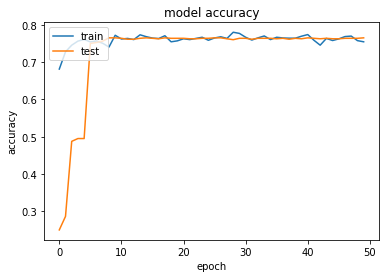

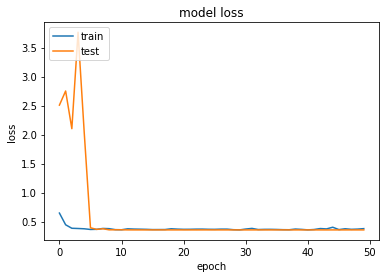

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" %metrics.accuracy_score(y_true, y_pred))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       0.53      0.61      0.57       200
           2       0.54      0.46      0.49       200
           3       1.00      1.00      1.00       200

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.76       800
weighted avg       0.77      0.77      0.76       800

Classification accuracy: 0.765000


## **Predictions**

squiggle


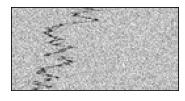

In [ ]:
def prediction(x):
  y_pred = np.argmax(model.predict(x_val), 1)
  plt.figure(0, figsize=(3,3))
  plt.subplot(1,1,1)
  img = np.squeeze(x_val[7])
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap="gray")
  if y_pred[x]== 0:
   print('squiggle')
  elif y_pred[x]== 1:
    print('Narrow-band signal')
  elif y_pred[x]== 2:
    print('Noise')
  else:
    print('Narrow-band-drd signal')

prediction(7)